Project on Medical insurance Cost Prediction

As we are facing a lot of health issues in a our daily life, it is very important to have medical insurance.

By working on this project, I was able to predict the Cost of Health insurance.Predicting of Medical cost insurance can be helpful for insurance companies for a better clarity on cost and they can have cost savings with the predicted data.

Using LinearRegression Model for Prediction

Variables in the Data set
1. Age             - Age of a person
2. Gender          - Gender
3. BMI             - Body mass index
4. Children        - How many children they have
5. Smoking status  - Does they smoke(yes/no)
6. Location        - location
7. Health insurance charge - charge of their medical insurance

Categorical Columns
1. gender
2. smoker
3. location

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [2]:
#Loading the Data from xlsx file to pandas DataFrame
insurance_dataset = pd.read_csv('/content/Health_insurance_cost.csv')

In [3]:
#top 5 rows of the dataframe
insurance_dataset.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape  #shape of data, to see the number of rows and columns

(1338, 7)

In [5]:
#getting the info about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [6]:
#renaming columns
insurance_dataset.rename(columns = {'BMI':'bmi','Children':'children','smoking_status':'smoker',
                                    'health_insurance_price':'charge'}, inplace = True)

In [7]:
insurance_dataset.isnull().sum() #checking missing values

age         28
gender       0
bmi         23
children     0
smoker       0
location     0
charge       2
dtype: int64

In [8]:
insurance_dataset.head()

,age,gender,bmi,children,smoker,location,charge
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


Dealing with Missing Values

In [10]:
from sklearn.impute import SimpleImputer # importing simple imputer
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
insurance_dataset['age'] = mean_imputer.fit_transform(insurance_dataset['age'].values.reshape(-1,1)) #imputing mean values to missing values of age column
insurance_dataset['bmi'] = mean_imputer.fit_transform(insurance_dataset['bmi'].values.reshape(-1,1)) #imputing mean values to missing values of bmi column
insurance_dataset['charge'] = mean_imputer.fit_transform(insurance_dataset['charge'].values.reshape(-1,1)) #imputing mean values to missing values of charge column
#  both fit a model to the data and then transform the data using that model

In [12]:
insurance_dataset.isnull().sum() #no missing values in the data

age         0
gender      0
bmi         0
children    0
smoker      0
location    0
charge      0
dtype: int64

Statistical Analysis

In [13]:
insurance_dataset.describe()

,age,bmi,children,charge
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,13.907422,6.057517,1.205493,12103.734649
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.521225
50%,39.166412,30.495000,1.000000,9388.753650
75%,51.000000,34.430000,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


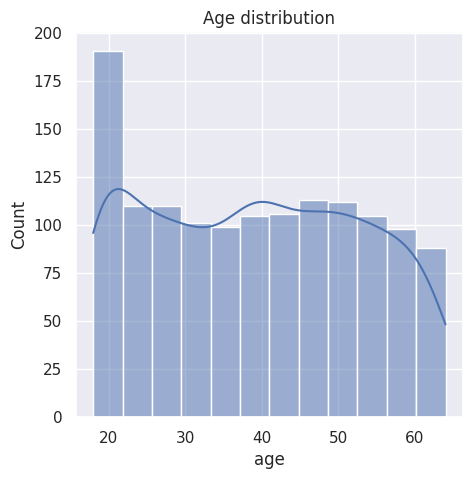

In [22]:
#distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['age'], kde=True)
plt.title('Age distribution')
plt.show()

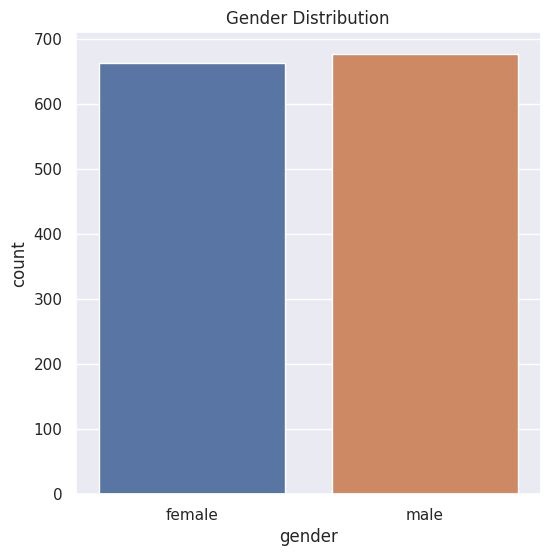

In [15]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=insurance_dataset) #plotting the countplot
plt.title('Gender Distribution') #title for plot
plt.show()

In [17]:
insurance_dataset['gender'].value_counts() #value count for each gender

male      676
female    662
Name: gender, dtype: int64

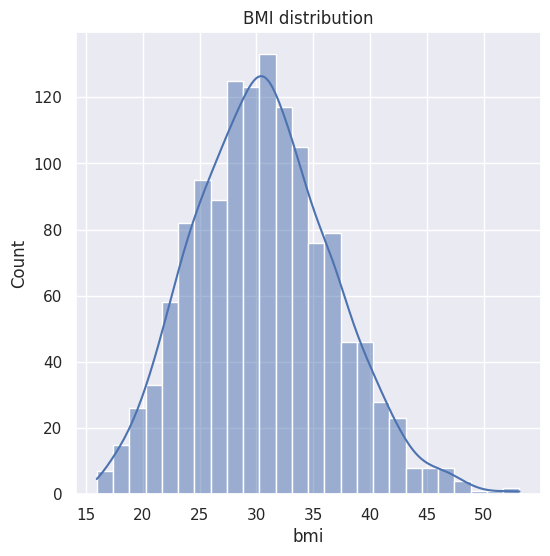

In [20]:
#distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI distribution')
plt.show()

Normal BMI Range is---> 18.5 - 24.9

Per analysis on BMI column, alot of people are over overweight

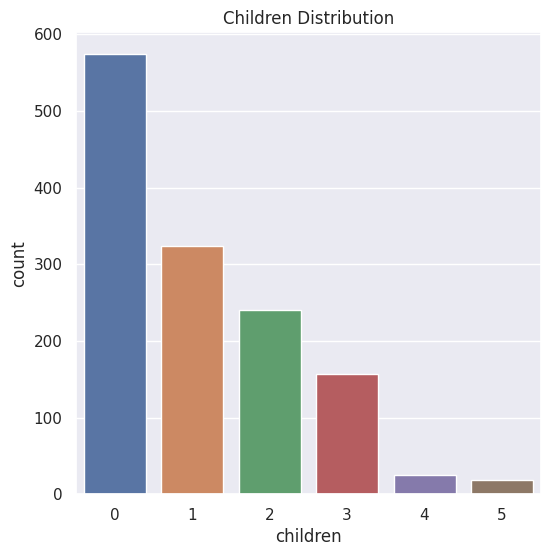

In [23]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset) #plotting the countplot
plt.title('Children Distribution') #title for plot
plt.show()

Per Analysis, more number of people have 0 children.

In [24]:
insurance_dataset['children'].value_counts() #values counts for each category

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

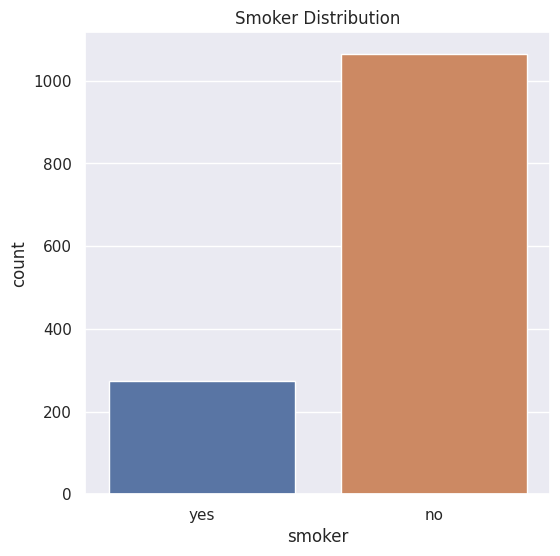

In [25]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset) #plotting the countplot
plt.title('Smoker Distribution') #title for plot
plt.show()

In [26]:
insurance_dataset['smoker'].value_counts()  #value counts to see exact numbers 

no     1064
yes     274
Name: smoker, dtype: int64

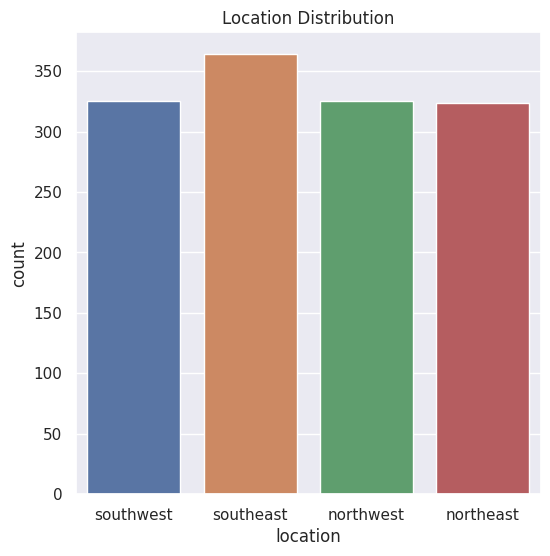

In [27]:
#location column
plt.figure(figsize=(6,6))
sns.countplot(x='location', data=insurance_dataset) #plotting the countplot
plt.title('Location Distribution') #title for plot
plt.show()

In [28]:
insurance_dataset['location'].value_counts()  #value counts to see exact numbers 

southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64

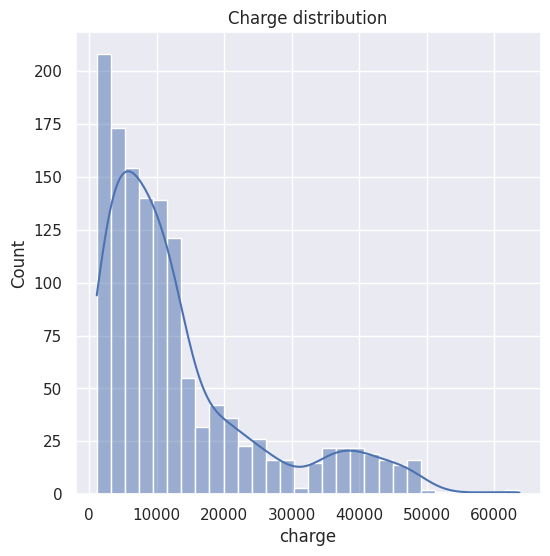

In [29]:
#distribution of charge column
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charge'], kde=True)
plt.title('Charge distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [33]:
#encoding gender column
insurance_dataset.replace({'gender':{'male':0,'female':1}}, inplace=True) # Converting males to 0 and females to 1

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True) ## Converting smokers to 0 and non smokers to 1

#encoding location column
insurance_dataset.replace({'location':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}}, inplace=True) 
## Converting southeast = 0, southwest = 1, northwest = 2, northeast = 3

Splitting the features and target

In [34]:
X = insurance_dataset.drop(columns='charge',axis=1) #assiging all columns except charges to variable X, considering as FEATURE
Y =  insurance_dataset['charge'] #assiging charges column to variable Y, considering as TARGET


In [35]:
print(X)

       age  gender        bmi  children  smoker  location
0     19.0       1  30.638217         0       0         1
1     18.0       0  33.770000         1       1         0
2     28.0       0  33.000000         3       1         0
3     33.0       0  22.705000         0       1         2
4     32.0       0  28.880000         0       1         2
...    ...     ...        ...       ...     ...       ...
1333  50.0       0  30.970000         3       1         2
1334  18.0       1  31.920000         0       1         3
1335  18.0       1  36.850000         0       1         0
1336  21.0       1  25.800000         0       1         1
1337  61.0       1  29.070000         0       0         2

[1338 rows x 6 columns]


In [36]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charge, Length: 1338, dtype: float64


Splitting the data into Training data and Testing data


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [43]:
#loading the linear regression model
regressor = LinearRegression()


In [45]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evalution

In [50]:
#prediction on train data
training_data_prediction = regressor.predict(X_train)


In [55]:
#R sqaured value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Value: ', r2_train)

R squared Value:  0.7427999268459611


In [52]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [56]:
#R sqaured value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared Value: ', r2_test)

R squared Value:  0.7446131602602963


Building a predictive system

In [59]:
#taking a sample data of one value from csv file (37,female,27.74,3,no,northwest)
#we already encoded categorical data into numerical.
#so replacing the caterogical data with encoded values (37,female,27.74,3,no,northwest) ---> (37,0,27.74,3,1,2)

input_data = (37,0,27.74,3,1,2)

In [61]:
#changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[8159.09492968]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Conclusion


I have analysed the data and made some changes by cleaning the data with imputation techniques and prepared the data ready for Model building. In ML model building, I have used LinearRegression to predict the price and after succesful prediction our model is working good.



Thank You